# Analysis of Global Suicide Rates and Prediction of Suicidal Demographics
## Data Analytics Final Project

- Ananya Veeraraghavan, PES1201800204
- Sakshi Shetty, PES1201800190
- Snigdha S Chenjeri, PES1201800045

This notebook performs exploratory data analysis and uses 3 machine learning models to achieve the solution to our problem statement.

### Datatset:
#### Suicide Rates Overview 1985 to 2016:
###### Compares socio-economic info with suicide rates by year and country

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

### Models Used:
 - Logistic Regression
 - K-fold Cross Validation with Random Forest Classifier
 - Artifical Neural Network
 
**Note:** The explanations behind which models we retained and which we discarded, and why we did so, are all explained in detail in our report. Please have our dataset and this notebook in the same directory for running. 

***
### PART 1: Preprocessing

Importing required libraries:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import joblib

Reading our dataset:

In [3]:
dataset = pd.read_csv("SuicideStats.csv")
dataset.head(5)

,Country,Year,Sex,Age,Suicides_No,Population,Suicides/100k_Pop,Country_Year,HDI.for.year,GDP_For_Year,GDP_Per_Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [4]:
dataset.shape

(27820, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            27820 non-null  object 
 1   Year               27820 non-null  int64  
 2   Sex                27820 non-null  object 
 3   Age                27820 non-null  object 
 4   Suicides_No        27820 non-null  int64  
 5   Population         27820 non-null  int64  
 6   Suicides/100k_Pop  27820 non-null  float64
 7   Country_Year       27820 non-null  object 
 8   HDI.for.year       8364 non-null   float64
 9   GDP_For_Year       27820 non-null  object 
 10  GDP_Per_Capita     27820 non-null  int64  
 11  Generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
dataset.describe()

,Year,Suicides_No,Population,Suicides/100k_Pop,HDI.for.year,GDP_Per_Capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Checking for null/missing values in our dataset:

In [7]:
dataset.isnull().sum()

Country                  0
Year                     0
Sex                      0
Age                      0
Suicides_No              0
Population               0
Suicides/100k_Pop        0
Country_Year             0
HDI.for.year         19456
GDP_For_Year             0
GDP_Per_Capita           0
Generation               0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

Since we have an attribute named 'Country' and an attribute named 'Year', the attribute 'Country_Year' is redundant. Hence, we'll be dropping it:

In [9]:
dataset = dataset.drop(columns='Country_Year')

In [10]:
dataset.head()

,Country,Year,Sex,Age,Suicides_No,Population,Suicides/100k_Pop,HDI.for.year,GDP_For_Year,GDP_Per_Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,15,66,24,900",796,Boomers


***
The dataset has a column named 'HDI For Year', amongst which the vast majority of values are null.

In [11]:
x = dataset['HDI.for.year'].isnull().sum()
y = dataset['HDI.for.year'].count()
print(x/(x+y)*100)

69.93529834651329


As you can see, around 70% of the data in this attribute is missing. It makes sense to drop this column.

In [12]:
dataset = dataset.drop(columns=['HDI.for.year'])
#dataset.head(5)

***
### PART 2: Exploratory Data Analysis

**Pandas Profiling** visualises our data and provides an understansing of the distribution of each variable.

In [13]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, minimal=True)
profile.to_file(output_file="088_TheSamples-PandasProfiling.html")

To view the html file containing the profiled output within Jupyter, uncomment the code given below (it's better to open it locally from where it gets saved in your system; otherwise, you can view it from the link to this html file that we have provided in the submission form):

In [12]:
'''from IPython.display import HTML

HTML(filename="088_TheSamples-PandasProfiling.html")'''

#Run this command to output the HTML file here itself. This may lead to the whole site getting magnified a bit
#probably, which isn't an issue; but it'll be better to open and view the HTML file from your directory.

'from IPython.display import HTML\n\nHTML(filename="output_min.html")'

#### Visualisations using graphs:

<BarContainer object of 27820 artists>

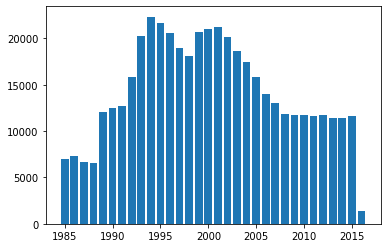

In [14]:
plt.bar(dataset['Year'], dataset['Suicides_No'])

The number of suicides seems to have been the highest (across all countries in the dataset) in 1994.
***

<AxesSubplot:xlabel='Year'>

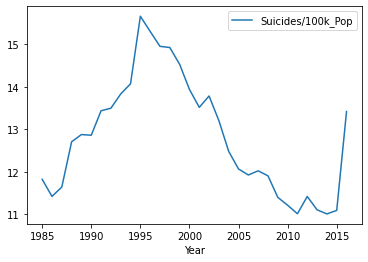

In [15]:
linedf = dataset.groupby(['Year']).agg({'Suicides/100k_Pop': 'mean'})
#linedf
linedf.reset_index().plot(x='Year', y='Suicides/100k_Pop')

The suicide rate seems to have been the highest (across all countries in the dataset) in 1995.
***

<AxesSubplot:xlabel='Age'>

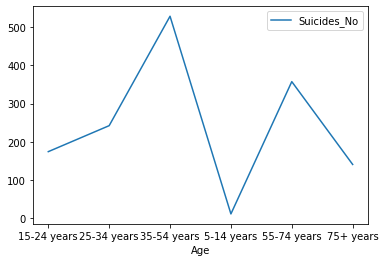

In [16]:
#age_order=['5-14 years','15-24 years','25-34 years','35-54 years']
linedf = dataset.groupby(['Age']).agg({'Suicides_No': 'mean'})
#linedf
linedf.reset_index().plot(x='Age', y='Suicides_No')

The number of suicides seems to have been the highest in the 35-54 years age group.
***

<BarContainer object of 27820 artists>

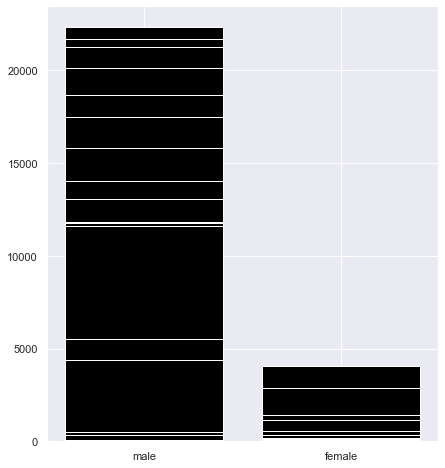

In [17]:
sns.set(rc={'figure.figsize':(7,8)})
plt.bar(dataset['Sex'], dataset['Suicides_No'], color='black')

The suicide rates for men are higher than for women. Next we see if this is consistent across all age groups.
***

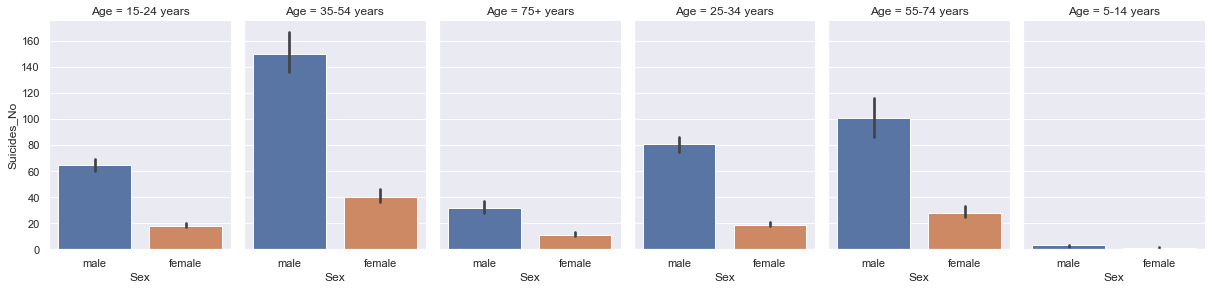

In [18]:
sns.catplot(x='Sex', y='Suicides_No',col='Age', data=dataset, estimator=np.median,height=4, aspect=.7,kind='bar')

Having plotted this graph, we see that the suicide rates in men is consistently higher across all age groups.
***

<AxesSubplot:xlabel='suicides_countries/100k', ylabel='Country'>

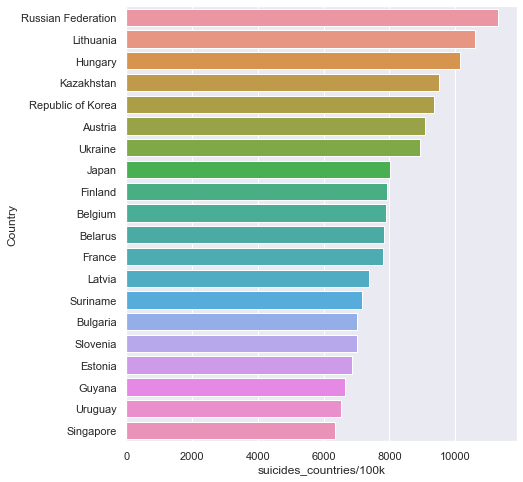

In [19]:
suicides_countries = []
for i in dataset['Country'].unique():
    suicides_countries.append(sum(dataset[dataset['Country'] == i]['Suicides/100k_Pop']))
    
x = pd.DataFrame(suicides_countries, columns=['suicides_countries/100k'])
x['Country'] = dataset['Country'].unique()

max_countries = x.sort_values('suicides_countries/100k', ascending=False)['Country'][:20]
max_suicides = x.sort_values('suicides_countries/100k', ascending=False)['suicides_countries/100k'][:20]
sns.barplot(x = max_suicides, y = max_countries)

More populous countries have a natural tendency to have more suicides. To overcome this the no of suicides had been normalised by the population of the country, ie, here the number of suicides is measured for every 100k inhabitants.
Here we have displayed the top 20 countries in terms of suicide rates. The Russian Federation and Lithuania have the highest suicide rate.
***

<AxesSubplot:>

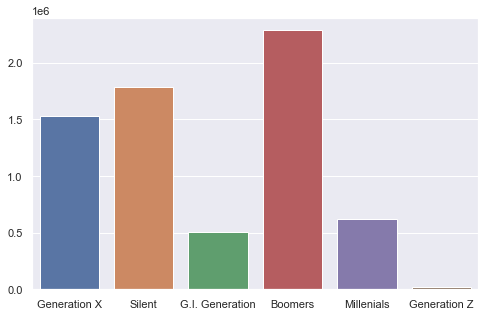

In [20]:
suicides_gen = []
for i in dataset['Generation'].unique():
    suicides_gen.append(sum(dataset[dataset['Generation'] == i]['Suicides_No']))
    
plt.figure(figsize=(8,5))
sns.barplot(x = dataset['Generation'].unique(), y = suicides_gen)

Here we try to see if generation influences the number of suicides.The boomers, silent and X generations are made up of people born until 1976. These are the ones who were most in the age range where most suicides occur.This corresponds to our findings when we visualised the relation between no of suicides and age.
***

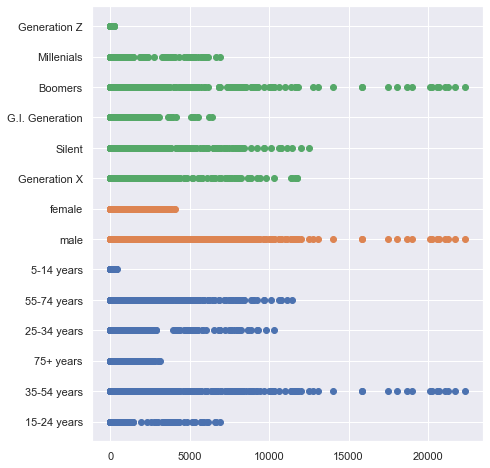

In [21]:
plt.scatter(dataset['Suicides_No'], dataset['Age'], label='SuicidesVsAge')
plt.scatter(dataset['Suicides_No'], dataset['Sex'], label='SuicidesVsSex')
plt.scatter(dataset['Suicides_No'], dataset['Generation'], label='SuicidesVsGeneration')

Here is a summary of the relation between number of suicides vs generation, gender and age. The suicides numbers have been highest among men belonging to the boomer generation/35-54 years age group.
***

In [22]:
for i, x in enumerate(dataset['GDP_For_Year']):
    dataset['GDP_For_Year'][i] = x.replace(',', '')
    
dataset['GDP_For_Year'] = dataset['GDP_For_Year'].astype('int64')

/Users/sakshishetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Here GDP_For_Year is a string, we remove the commas and convert it into an integer so that we can use it for visualisations.
***

<AxesSubplot:xlabel='GDP_For_Year', ylabel='Suicides_No'>

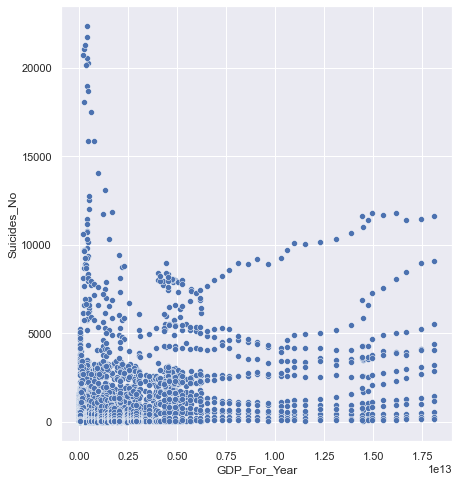

In [23]:
sns.scatterplot(x = dataset['GDP_For_Year'], y = 'Suicides_No', data = dataset)

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Suicides_No'>

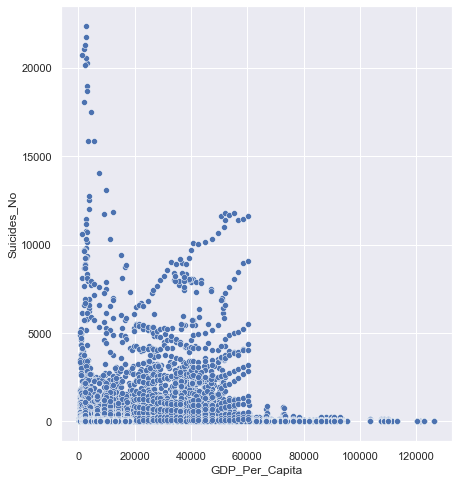

In [24]:
sns.scatterplot(x = 'GDP_Per_Capita', y = 'Suicides_No', data = dataset)

Here we study the relation between GDP Per Capita and No of Suicides. According to the visualisation poorer countries are prone to a larger number of suicides. As the income increases, suicide decrease. However, from 20k (GDP_Per_Capita), the number of suicides increases again. The data then seems to show some flaws after 60k.
***

***Heatmap*** showing the correlation between all the attributes:

<AxesSubplot:>

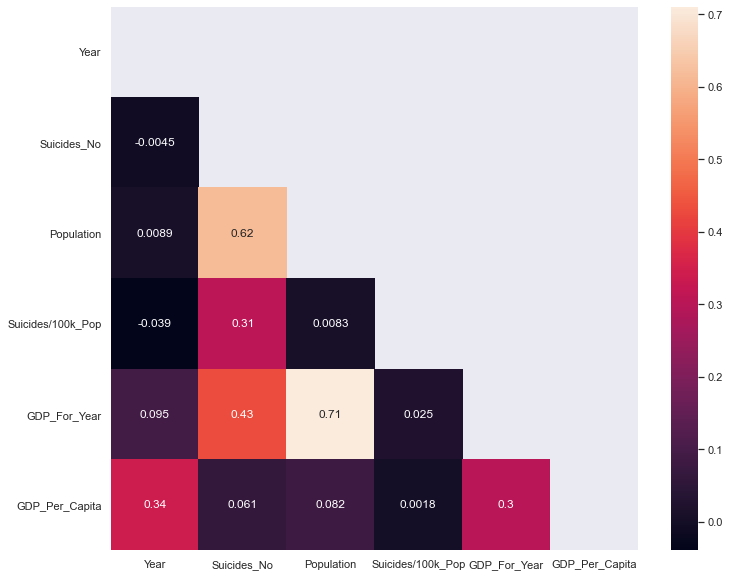

In [25]:
sns.set(rc={'figure.figsize':(11.8,10)})
cor_data = dataset
cor_matrix = cor_data.corr()
mask = np.zeros_like(cor_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(cor_matrix,mask=mask, annot=True)

As can be seen from the above heatmap, GDP_For_Year and Population have the highest linear correlation, implying that higher population would mean higher gdp. However, the relation between GDP and population is ultimately unrelated to the number of suicides in a country. Population and the number of suicides have the second highest correlation. This is an inherent inference since the number of suicides in larger populations could typically be higher. We also observe that Suicides/100k_Pop vs GDP_Per_Capita has a negligible correlation. This shows that the two aren't linearly dependent on each other.

***
### PART 3: Predictions Using Models

We have used Logistic Regression, K-fold Cross Validation 

In [18]:
#!pip install --upgrade scikit-learn

In [53]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

#### 1. Predict the Generation
Note: all inferences regarding the performance of our models and reasoning behind why certain models did not perform well have been detailed thoroughly in our final report.

##### Logistic Regression:

In [58]:
#This is to prepare the last column, i.e Generation, for logistic regression.
data = dataset.values
X1 = data[:, :-1].astype(str)
y1 = data[:, -1].astype(str)

# one-hot encode input variables
onehot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()

X1 = onehot_encoder.fit_transform(X1)
y1 = label_encoder.fit_transform(y1)

# split the dataset into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=1)

# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X1_train, y1_train)
# predict on test set
yhat = model.predict(X1_test)

# evaluate predictions
accuracy = accuracy_score(y1_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))
print('Precision: %.2f' % (100*precision_score(y1_test, yhat, average='weighted')))

Accuracy: 94.06
Precision: 94.25


/Users/sakshishetty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


***
##### K-fold Cross Validation with Random Forest Model to predict the generation that the suicidal individual belongs to:

In [24]:
# one-hot encode input variables
Xk = data[:, :-1].astype(str)
yk = data[:, -1].astype(str)
Xk = onehot_encoder.fit_transform(Xk)
yk = label_encoder.fit_transform(yk)

Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk, yk, test_size=0.33, random_state=1)

We are performing 10-fold cross validation as shown below:

In [25]:
rfcg=RandomForestClassifier(random_state=42)
param_gridg = { 
    'n_estimators': [1000],
    'max_features': ['auto'],
    'max_depth' : [8],
    'criterion' :['gini']
}
CV_rfcg = GridSearchCV(estimator=rfcg, param_grid=param_gridg, cv=10)
CV_rfcg.fit(Xk_train, yk_train)
#CV_rfc.best_params_

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [8],
                         'max_features': ['auto'], 'n_estimators': [1000]})

In [26]:
prediction_g = CV_rfcg.predict(Xk_test)
print("Accuracy for Random Forest on 10-fold cross validation data: %.2f" % (accuracy_score(yk_test,prediction_g)*100))

Accuracy for Random Forest on 10-fold cross validation data: 51.31


K-fold cross validation resamples data multiple times. We have elaborated in our report why this method doesn't work for our dataset. Read to find out!

***
#### 2. Predict the Sex

##### Logistic Regression:

In [61]:
#This is to prepare the 'Sex' attribute for logistic regression.
dataX = dataset.drop(['Sex'], axis=1).values
dataY = dataset['Sex'].values
Xl = dataX.astype(str)
yl = dataY.astype(str)
Xl = onehot_encoder.fit_transform(Xl)
yl = label_encoder.fit_transform(yl)

# split the dataset into train and test sets
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size=0.33, random_state=1)

# define the model
model = LogisticRegression()
# fit on the training set
model.fit(Xl_train, yl_train)
# predict on test set
yhat = model.predict(Xl_test)

# evaluate predictions
accuracy = accuracy_score(yl_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.38


/Users/sakshishetty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


As you can see, the logistic regression model gives a low accuracy for prediction of Sex. This is why (in the subsequent sections) we built an artificial neural network for predicting this variable.

***
##### K-fold Cross Validation with Random Forest Model to predict the sex of a suicidal individual:

In [8]:
X2 = dataX.astype(str)
y2 = dataY.astype(str)

# one-hot encode input variables
X2 = onehot_encoder.fit_transform(X2)
y2 = label_encoder.fit_transform(y2)

In [9]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=1)

We are performing 10-fold cross validation as shown below:

In [10]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [1000],
    'max_features': ['auto'],
    'max_depth' : [8],
    'criterion' :['gini']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10)
CV_rfc.fit(X2_train, y2_train)
#CV_rfc.best_params_

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [8],
                         'max_features': ['auto'], 'n_estimators': [1000]})

In [14]:
prediction = CV_rfc.predict(X2_test)

In [17]:
print("Accuracy for Random Forest on 10-fold cross validation data: %.2f" % (accuracy_score(y2_test,prediction)*100))

Accuracy for Random Forest on 10-fold cross validation data: 58.20


Once again, this model performs poorly for reasons specified in our report.

***
##### Artifical Neural Network to predict sex:

In [70]:
import tensorflow
seed = 42
np.random.seed(seed)

#dataX and dataY as declared before
X = dataX.astype(str)
y = dataY.astype(str)
X3 = onehot_encoder.fit_transform(X)
y3 = label_encoder.fit_transform(y)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=1)

In [73]:
from keras.models import Sequential
from keras.layers import Dense
model2 = Sequential()
n = X3.shape[1]  #number of columns in training data

model2.add(Dense(250, activation='relu', input_shape=(n,)))
model2.add(Dense(250, activation='relu'))
model2.add(Dense(250, activation='relu'))
model2.add(Dense(2, activation='softmax'))
#accuracy seems to vary vastly based on the usage of sigmoid or relu or softmax
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [74]:
model2.fit(X3_train, y3_train, epochs=5)

Epoch 1/5
18639/18639 [==============================] - 57s 3ms/step - loss: 0.6896 - acc: 0.5367
Epoch 2/5
18639/18639 [==============================] - 55s 3ms/step - loss: 0.5165 - acc: 0.7329
Epoch 3/5
18639/18639 [==============================] - 57s 3ms/step - loss: 0.1571 - acc: 0.9312
Epoch 4/5
18639/18639 [==============================] - 58s 3ms/step - loss: 0.0332 - acc: 0.9881
Epoch 5/5
18639/18639 [==============================] - 58s 3ms/step - loss: 0.0124 - acc: 0.9962


Accuracy: as seen in the last epoch.
***

#### This concludes our project. Thank you!
***